<a href="https://colab.research.google.com/github/Mbashas/SecondYear/blob/main/Data_Science2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Areas with Environmental Threats:
    Satellite_Imagery  Sensor_Data  Wildlife_Tracking
2               0.60         0.70                  1
5               0.45         0.50                  1
7               0.70         0.80                  1
8               0.65         0.75                  1


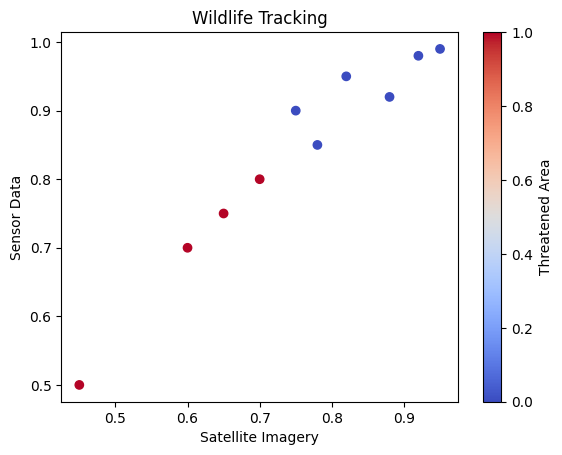

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

class DataProcessor:
    def __init__(self, data):
        self.data = data
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def split_data(self, test_size=0.2, random_state=42):
        self.X = self.data[['Satellite_Imagery', 'Sensor_Data']]
        self.y = self.data['Wildlife_Tracking']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)

class ModelTrainer:
    def __init__(self, data_processor):
        self.data_processor = data_processor
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def train_model(self):
        self.model.fit(self.data_processor.X_train, self.data_processor.y_train)

    def evaluate_model(self):
        y_pred = self.model.predict(self.data_processor.X_test)
        accuracy = accuracy_score(self.data_processor.y_test, y_pred)
        report = classification_report(self.data_processor.y_test, y_pred)
        return accuracy, report

class DataVisualizer:
    def __init__(self, data_processor):
        self.data_processor = data_processor

    def visualize_threatened_areas(self):
        threatened_areas = self.data_processor.data.loc[self.data_processor.data['Wildlife_Tracking'] == 1]
        print("\nAreas with Environmental Threats:\n", threatened_areas)

        # Visualize the data
        plt.scatter(self.data_processor.data['Satellite_Imagery'], self.data_processor.data['Sensor_Data'], c=self.data_processor.data['Wildlife_Tracking'], cmap='coolwarm')
        plt.xlabel('Satellite Imagery')
        plt.ylabel('Sensor Data')
        plt.title('Wildlife Tracking')
        plt.colorbar(label='Threatened Area')
        plt.show()

if __name__ == "__main__":
    data = {
        'Satellite_Imagery': [0.75, 0.82, 0.60, 0.92, 0.78, 0.45, 0.88, 0.70, 0.65, 0.95],
        'Sensor_Data': [0.90, 0.95, 0.70, 0.98, 0.85, 0.50, 0.92, 0.80, 0.75, 0.99],
        'Wildlife_Tracking': [0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    }

    data_processor = DataProcessor(pd.DataFrame(data))
    data_processor.split_data()

    model_trainer = ModelTrainer(data_processor)
    model_trainer.train_model()
    accuracy, report = model_trainer.evaluate_model()

    print("Model Accuracy: {:.2f}%".format(accuracy * 100))
    print("\nClassification Report:\n", report)

    data_visualizer = DataVisualizer(data_processor)
    data_visualizer.visualize_threatened_areas()
